In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from matplotlib.colors import ListedColormap as lcmap
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from scipy.spatial import distance_matrix

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# define constants
IMG_H = 28
IMG_W = 28
NUM_DIGITS = 10
INTENSITY_THRESHOLD = 127

# read data
data_frame = pd.read_csv('C:/sagar/mnist/mnist_train.csv',dtype=np.int32,header=None)
NUM_TRAIN_IMAGES = data_frame.shape[0]
NUM_PIXELS = data_frame.shape[1]-1

In [3]:
# re-format data
def reformat_data(data_frame):
    np_data_frame = data_frame.values
    images = np_data_frame[:,1:]
    labels = np_data_frame[:,0]
    
    return [images, labels]

[images_train, labels_train] = reformat_data(data_frame)

In [4]:
images = images_train
labels = labels_train

0.16800588418808404


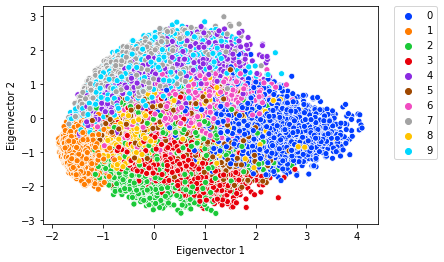

In [5]:
components = 2
pca = PCA(n_components=components, whiten=True, svd_solver='full')
pca.fit(images)
print(sum(pca.explained_variance_ratio_))
pca_images = pca.transform(images)
sns.scatterplot(pca_images[:,0], pca_images[:,1], hue=labels, palette=sns.color_palette("bright", 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')
plt.show()

1.8588037490844727


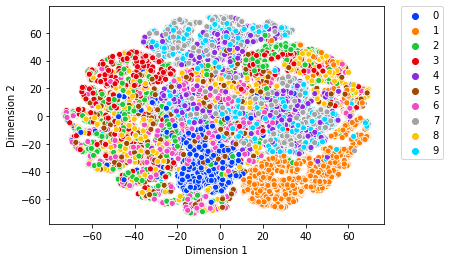

In [9]:
tsne = TSNE(n_components=2)
em = tsne.fit_transform(pca_images)
print(tsne.kl_divergence_)
sns.scatterplot(em[:,0], em[:,1], hue=labels, palette=sns.color_palette("bright", 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

0.8246468633334723
3.1280317306518555


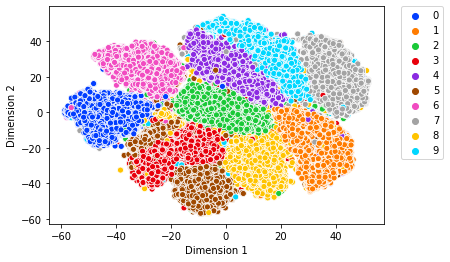

In [10]:
components = 50
pca = PCA(n_components=components, whiten=True, svd_solver='full')
pca.fit(images)
print(sum(pca.explained_variance_ratio_))
pca_images = pca.transform(images)
tsne = TSNE(n_components=2)
em = tsne.fit_transform(pca_images)
print(tsne.kl_divergence_)
sns.scatterplot(em[:,0], em[:,1], hue=labels, palette=sns.color_palette("bright", 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()